<a href="https://colab.research.google.com/github/Devsharma003/Dev/blob/main/support_vector_machines%5Bsalary_data%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Set = Salary Data**


#  Objective

# prepare a classification model using SVM for salary










In [ ]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [ ]:
salary_test=pd.read_csv('SalaryData_Test(1).csv')

In [ ]:
salary_test[:3]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [ ]:
salary_train=pd.read_csv('SalaryData_Train(1).csv')

In [ ]:
salary_train[:3]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(salary_train["Salary"])

ValueError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder
salary_train = salary_train.apply(LabelEncoder().fit_transform)
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [ ]:
salary_train.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
Salary           int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
salary_test = salary_test.apply(LabelEncoder().fit_transform)
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [ ]:
salary_test.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
Salary           int64
dtype: object

In [ ]:
X_train = salary_train.drop(['workclass','education','relationship','native','maritalstatus','sex','race'],axis=1)
Y_train = salary_train["Salary"]
print(np.unique(Y_train))
X_train.head()

[0 1]


,age,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,22,12,0,24,0,39,0
1,33,12,3,0,0,12,0
2,21,8,5,0,0,39,0
3,36,6,5,0,0,39,0
4,11,12,9,0,0,39,0


In [ ]:
X_test = salary_test.drop(['workclass','education','relationship','native','maritalstatus','sex','race'],axis=1)
Y_test = salary_test["Salary"]
print(np.unique(Y_test))
X_test.head()

[0 1]


,age,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,8,6,6,0,0,39,0
1,21,8,4,0,0,49,0
2,11,11,10,0,0,39,1
3,27,9,6,87,0,39,1
4,17,5,7,0,0,29,0


In [ ]:
X_train.shape, Y_train.shape

((30161, 7), (30161,))

In [ ]:
X_test.shape, Y_test.shape

((15060, 7), (15060,))

In [ ]:
# Linear Support Vector Machine
from sklearn.svm import SVC
svc = SVC(gamma = 0.22)
svc.fit(X_train, Y_train)
# Y_pred = Logreg.predict(X_test)
score_svc = svc.score(X_test, Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.9072377158034528


In [ ]:
# Radical Spport Vector Machine
svc_redical = svm.SVC(kernel='rbf', C=1, gamma = 0.22)
svc_redical.fit(X_train, Y_train.values.ravel())
score_svc_redical = svc_redical.score(X_test, Y_test)
print("The Accuracy of Radical SVC Model is", score_svc_redical)

The Accuracy of Radical SVC Model is 0.9072377158034528


In [ ]:
from sklearn import svm
svc_radical = svm.SVC(kernel = 'sigmoid',C=1, gamma =0.22)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_redical.score(X_test, Y_test)
print("The Accuracy of sigmoid SVC Model is", score_svc_redical)

The Accuracy of sigmoid SVC Model is 0.9072377158034528


In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.33)
svc.fit(X_test, Y_test)
# Y_pred = logreg.preidct(X_test)
score_svc = svc.score(X_test, Y_test)
print('The Accuracy of SVC is', score_svc)

The Accuracy of SVC is 0.9948207171314741


In [ ]:
from sklearn import svm
svc_radical = svm.SVC(kernel = 'poly', C=1,gamma = 0.33)
svc_radical.fit(X_train, Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test, Y_test)
print('The accuracy of poly SVC Model is', score_svc_radical)

The accuracy of poly SVC Model is 0.999933598937583


In [ ]:
clf = SVC(kernel = 'poly', C=1, gamma = 0.33)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 99.99335989375831


array([[11360,     0],
       [    1,  3699]])

In [ ]:
print(classification_report(salary_test['Salary'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11360
           1       1.00      1.00      1.00      3700

    accuracy                           1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060



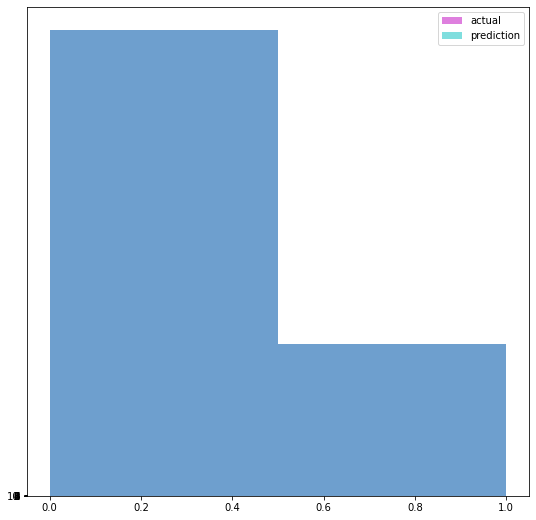

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(Y_test, color = 'm', alpha = 0.5, label = 'actual', bins = 2)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins = 2)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

# Conclusion:-


###  poly SVC model is predict the test dataset with 99% accuracy